In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from sigsen.simulator import SensorField
%matplotlib inline

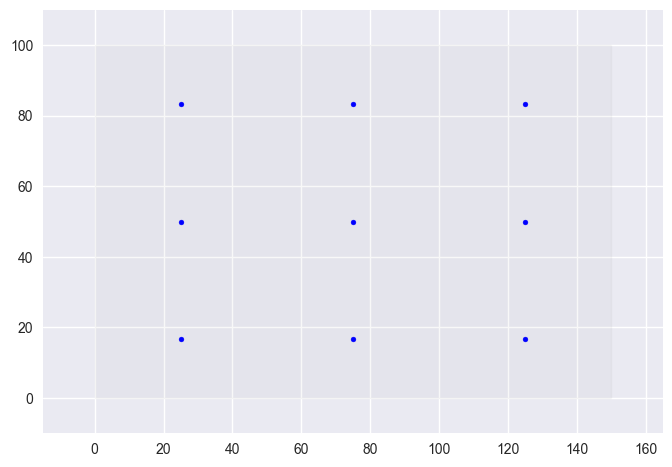

In [76]:
arange = SensorField(0,150,0,100)
arange.add_sensor_grid((3,3))
fig, ax = arange.display()

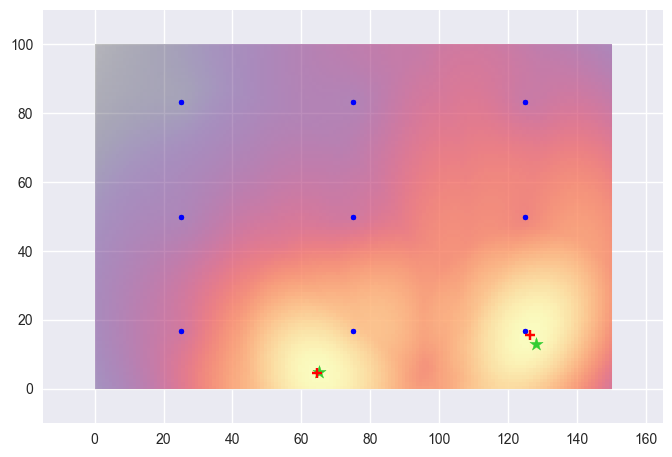

In [34]:
sigs = arange.gen_data(2, noise=4)
sigs.compute_distribution((150,100))
_, _ = sigs.display(exp_factor=0.0025, show_maxima=True)

In [35]:
def record_data_point(n=1, fn='dat.npy', init=False):
    new_dat = []
    for _ in tqdm(range(n)):
        noise = 5*np.random.rand()
        sigs = arange.gen_data(2, noise=noise)
        sigs.compute_distribution((150,100))
        new_dat += [[noise, sigs.score()]]
    if init:
        dat = np.array(new_dat)
    else:
        dat = np.load(fn, allow_pickle=True)
        dat = np.concatenate((dat, np.array(new_dat)), axis=0)
    np.save(fn, dat)

In [43]:
record_data_point(9000, fn='dat3x3.npy')

100%|██████████| 9000/9000 [2:29:06<00:00,  1.01it/s]  


(10000, 2)


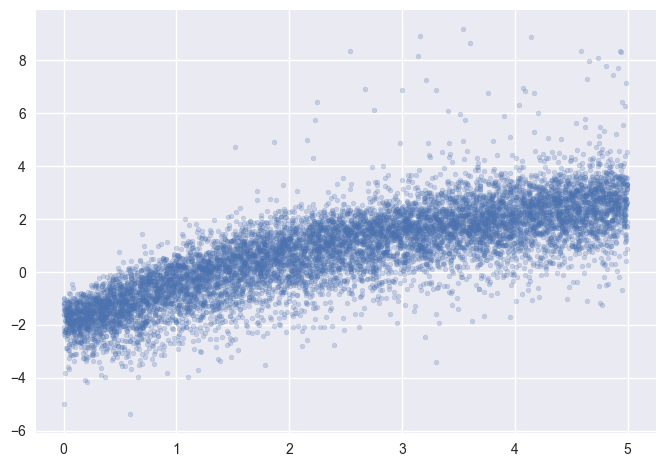

In [74]:
fig, ax = plt.subplots()
dat = np.load('dat3x3.npy', allow_pickle=True)
print(dat.shape)
noise = dat[:, 0]
log_error = np.log(dat[:, 1])
ax.scatter(noise, log_error, alpha=0.25, marker='.')